In [2]:
# Import the required libaries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [16]:
# Read the data to a dataframe.
df_reviews_dummies = pd.read_csv('Prepped_test_out.csv', low_memory=False)
df_games = pd.read_csv('steam_games.csv', sep=';', engine='python')

In [18]:
# Grab a sample from the dataframe to reduce the size and reduce the time to run.
df_sampled = df_reviews_dummies.sample(50000)

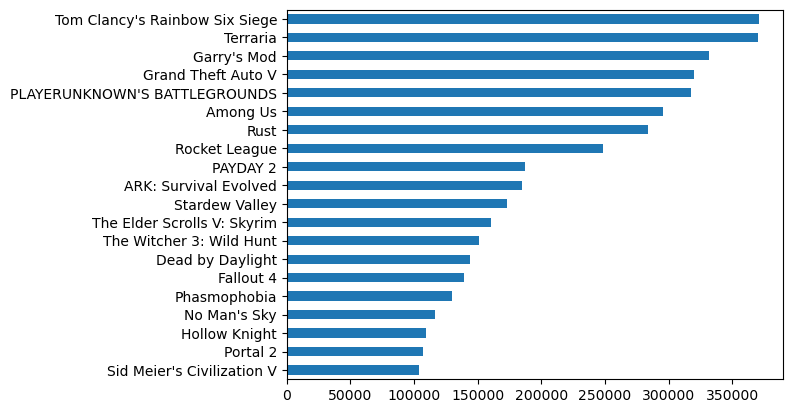

In [20]:
# Create a bar chart to check the games with the highest counts.
df_reviews_dummies.app_name.value_counts().head(20).plot(kind='barh').invert_yaxis()

<AxesSubplot:xlabel='author.steamid', ylabel='Count'>

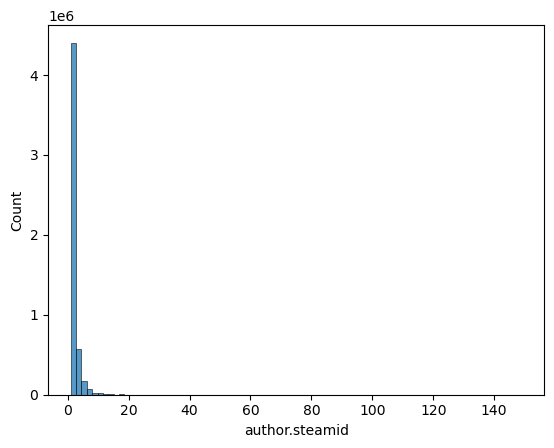

In [27]:
# Use seaborn for a histogram for author ids
sns.histplot(df_reviews_dummies.groupby("author.steamid")["author.steamid"].count(), bins=84)

<AxesSubplot:xlabel='app_name', ylabel='Count'>

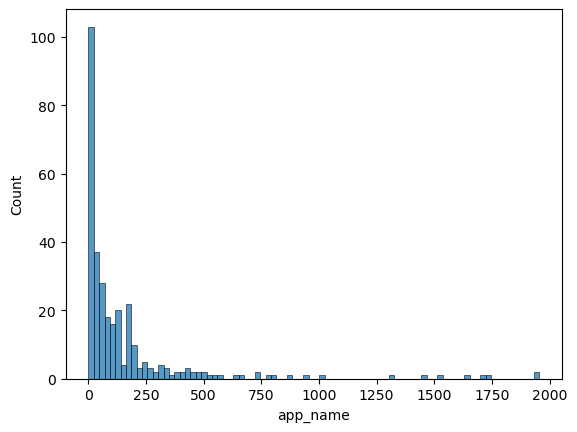

In [28]:
# Use seaborn for a histogram for app names: large bins
sns.histplot(df_sampled.groupby("app_name")["app_name"].count(), bins=84)

<AxesSubplot:xlabel='app_name', ylabel='Count'>

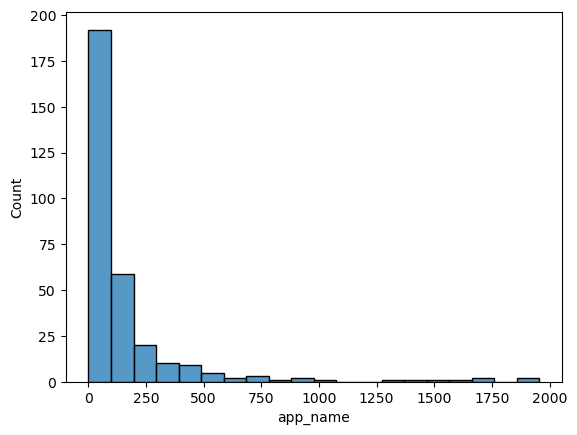

In [29]:
# Use seaborn for a histogram for app names: small bins
sns.histplot(df_sampled.groupby("app_name")["app_name"].count(), bins=20)

<AxesSubplot:ylabel='Count'>

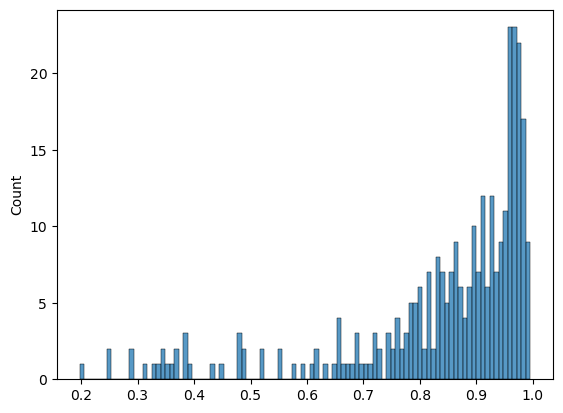

In [47]:
# Plot a histogram based on games that were recommended.
sns.histplot(df_reviews_dummies.groupby("app_name")["recommended_True"].sum().div(df_reviews_dummies.groupby("app_name")["app_name"].count()), bins=100)

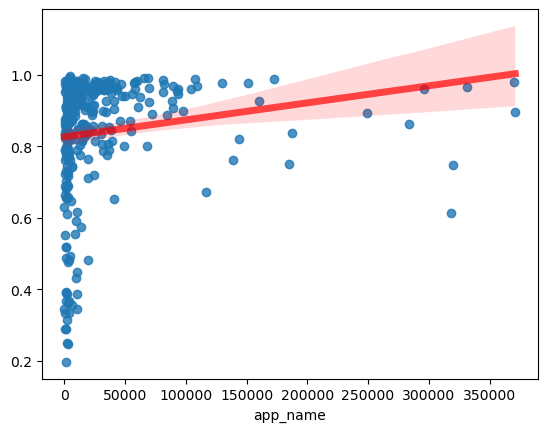

In [54]:
# Create a regplot to review the previous data with line kws
sns.regplot(x=df_reviews_dummies.groupby("app_name")["app_name"].count(), 
            y=df_reviews_dummies.groupby("app_name")["recommended_True"].sum().div(df_reviews_dummies.groupby("app_name")["app_name"].count()), 
            line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

<AxesSubplot:ylabel='Count'>

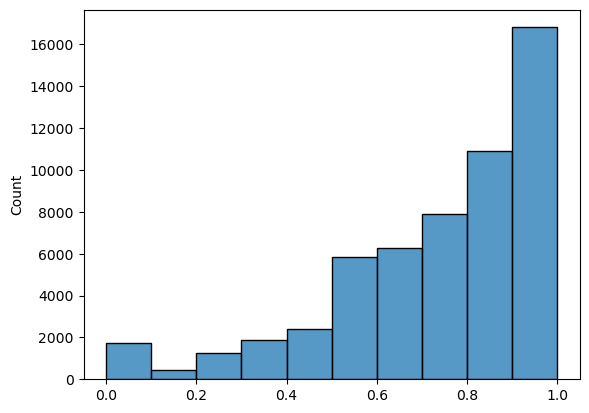

In [66]:
# Create a new column and use it to get the count of positive reviews.
df_games['Total Reviews'] = df_games['Positive Reviews'] + df_games['Negative Reviews']

sns.histplot(df_games['Positive Reviews'].div(df_games['Total Reviews']), bins=10)

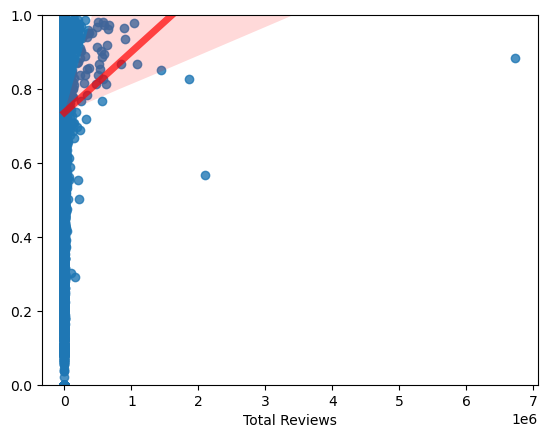

In [73]:
# Create another graph to see the total positive reviews another way.
ax = sns.regplot(x=df_games['Total Reviews'], y=df_games['Positive Reviews'].div(df_games['Total Reviews']), 
                 line_kws={"color":"r","alpha":0.7,"lw":5})
ax.set(ylim=(0,1))
plt.show()

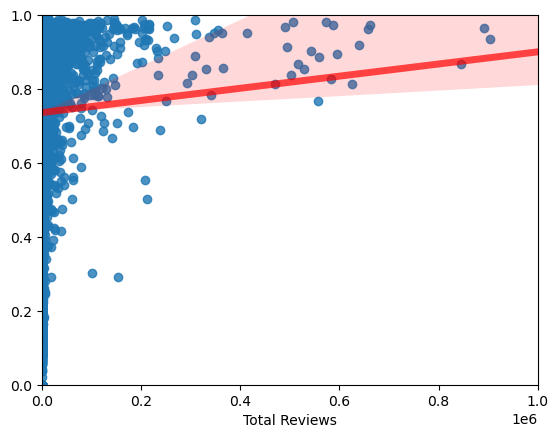

In [72]:
# Increase the limits to determine closer information from the graph.
ax = sns.regplot(x=df_games['Total Reviews'], y=df_games['Positive Reviews'].div(df_games['Total Reviews']), 
                 line_kws={"color":"r","alpha":0.7,"lw":5})
ax.set(ylim=(0, 1))
ax.set(xlim=(0, 1000000))
plt.show()

In [63]:
# Review the total positive reviews based on their data.
df_games['Positive Reviews'].div(df_games['Total Reviews'])

0        0.974813
1        0.843750
2        0.861907
3        0.931953
4        0.000000
           ...   
55686    0.800000
55687    1.000000
55688    0.387097
55689    0.500000
55690    1.000000
Length: 55691, dtype: float64

In [ ]:
sns.histplot(df_reviews_dummies.groupby("app_name")["recommended_True"].sum().div(df_reviews_dummies.groupby("app_name")["app_name"].count()), bins=100)

In [49]:
df_reviews_dummies.groupby("app_name")["recommended_True"].sum().div(df_reviews_dummies.groupby("app_name")["app_name"].count())

app_name
20XX                                     0.936753
A Hat in Time                            0.982401
A Short Hike                             0.990007
A Way Out                                0.890177
ARK: Survival Evolved                    0.751864
                                           ...   
XCOM 2                                   0.853120
Yakuza 0                                 0.956937
Youtubers Life                           0.746134
theHunter: Call of the Wild™             0.856087
三国群英传8 Heroes of the Three Kingdoms 8    0.630769
Length: 315, dtype: float64

In [53]:
df_sampled.groupby("app_name")["recommended_True"].count()

app_name
20XX                             15
A Hat in Time                   121
A Short Hike                     18
A Way Out                        23
ARK: Survival Evolved           954
                               ... 
X-Plane 11                       22
XCOM 2                          171
Yakuza 0                         98
Youtubers Life                   34
theHunter: Call of the Wild™    123
Name: recommended_True, Length: 312, dtype: int64

In [42]:
df_sampled.groupby("app_name")["recommended_True"].sum().div(df_sampled.groupby("app_name")["app_name"].count())

app_name
20XX                            0.933333
A Hat in Time                   0.983471
A Short Hike                    1.000000
A Way Out                       0.956522
ARK: Survival Evolved           0.744235
                                  ...   
X-Plane 11                      0.909091
XCOM 2                          0.859649
Yakuza 0                        0.979592
Youtubers Life                  0.852941
theHunter: Call of the Wild™    0.861789
Length: 312, dtype: float64

In [26]:
len(df_reviews_dummies.groupby("author.steamid")["author.steamid"].count().unique())

84

In [ ]:
df_reviews_dummies.columns

Index(['app_id', 'app_name', 'review', 'timestamp_created',
       'timestamp_updated', 'votes_helpful', 'votes_funny',
       'weighted_vote_score', 'comment_count', 'author.steamid',
       'author.num_reviews', 'author.playtime_forever',
       'author.playtime_last_two_weeks', 'author.playtime_at_review',
       'recommended_False', 'recommended_True', 'steam_purchase_False',
       'steam_purchase_True', 'received_for_free_False',
       'received_for_free_True', 'written_during_early_access_False',
       'written_during_early_access_True', 'prepped_review_lemm'],
      dtype='object')

In [35]:
df_sampled["recommended_True"]

5788633    1
8020267    1
9411789    1
527781     1
7947393    0
          ..
3860984    1
241777     1
7869301    1
1725704    1
7874999    1
Name: recommended_True, Length: 50000, dtype: int64